
Методы градиентного спуска
Дано:
Целевая функция:        f(x, y) = (x - 1)**2 + (x**2 - y)**2
Начальное приближение:  X0 = [-1 -2]
Точность вычисления:    Eps = 0.001

____________________________________________________________________________________________________
                                Метод наискорейщего спуска                                
Точка минимума функции:             Xmin = [0.99930768 0.99818941]
Значение функции в точке минимума:  f(Xmin) = 6.611456184357776e-07
Количество итераций:                k = 97

____________________________________________________________________________________________________
                      Метод градиентного спуска с дроблением шага                      
Точка минимума функции:             Xmin = [0.9988983  0.99734111]
Значение функции в точке минимума:  f(Xmin) = 1.422323869453006e-06
Количество итераций:                k = 271


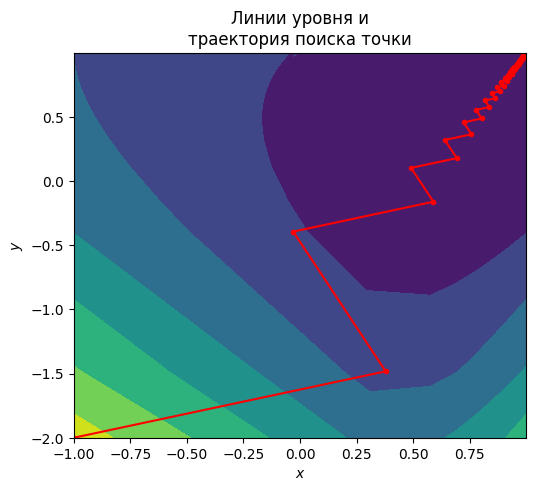

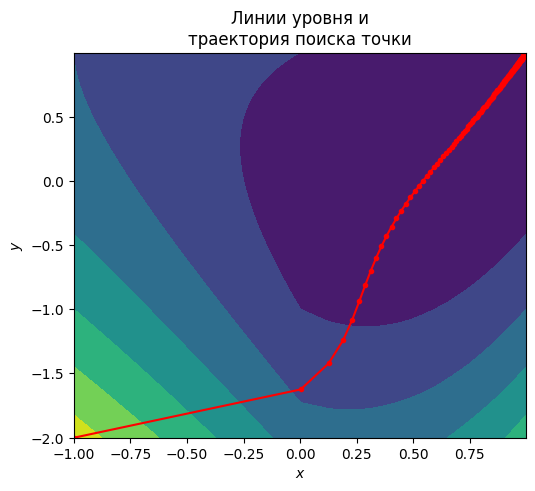

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy


# Дано:
alpha = 1
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
X0 = np.array([-1, -2])
eps = 1e-3

# Параметры методов:
kappa0 = 1
nu = 0.95
omega = 0.5

# Вычисление градиента:
x_sym, y_sym = sympy.Symbol('x'), sympy.Symbol('y')
Grad_f = sympy.tensor.array.derive_by_array(f(x_sym, y_sym), (x_sym, y_sym))
Grad_f = sympy.lambdify((x_sym, y_sym), Grad_f, 'numpy')

#Метод золотого сечения
def MethodGoldenRatio(f, b, a = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = f(Xk1), f(Xk2)
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
    return (Ak + Bk) / 2

#Метод градиентного спуска
def MethodsGradientDescent(flag):
    fun = lambda X: f(X[0], X[1])
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    X = X0
    kappa_k = kappa0
    NormW = []
    Xk = [[], []]
    while True:
        Xk[0].append(X[0])
        Xk[1].append(X[1])
        Wk = w(X)
        NormW.append(np.linalg.norm(Wk))
        if NormW[-1] <= eps:
            break
        fk = fun(X)
        if flag == 0:
            phi = lambda kappa: fun(X + kappa * Wk)
            kappa_k = MethodGoldenRatio(phi, 2.5)
            X = X + kappa_k * Wk
        elif flag == 1:
            Xcurr = X + kappa_k * Wk
            while fk - fun(Xcurr) <= omega * kappa_k * NormW[-1]**2:
                kappa_k *= nu
                Xcurr = X + kappa_k * Wk
            X = Xcurr
    return X, Xk, NormW

#Рисует
def DrawSurfContourAndWk(Xmin, Xk, NormW, flag):
    fig = plt.figure(figsize=(14, 5))
    axes1 = fig.add_subplot(1, 3, 1, projection='3d')
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.4)
    if flag == 0:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска')
    elif flag == 1:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска с дроблением шага')

    delta = max(abs(Xmin[0] - X0[0]), abs(Xmin[1] - X0[1]))
    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta/2, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, c='red', label='X0 - начальное приближение')
    axes1.scatter(Xmin[0], Xmin[1], f(Xmin[0], Xmin[1]), s=20, c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')

    X, Y = np.meshgrid(Xk[0], Xk[1])
    Z = f(X, Y)
    axes2.contourf(X, Y, Z)
    axes2.plot(Xk[0], Xk[1], marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Линии уровня и\nтраектория поиска точки')

    k = range(len(NormW))
    axes3.plot(k, NormW)
    axes3.set_xlabel('$k$')
    axes3.set_ylabel('$\|w_k\|$')
    axes3.set_title('Зависимость нормы\nантиградиента $\|w_k\|$ от параметра $k$')


def DrawSurfContourAndWk1(Xmin, Xk, NormW, flag):
    fig = plt.figure(figsize=(14, 5))
 
    axes2 = fig.add_subplot(1, 2, 1)
    
    plt.subplots_adjust(wspace=0.4)
    if flag == 0:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска')
    elif flag == 1:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска с дроблением шага')

    # delta = max(abs(Xmin[0] - X0[0]), abs(Xmin[1] - X0[1]))
    # X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta/2, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    # Z = f(X, Y)
   

    X, Y = np.meshgrid(Xk[0], Xk[1])
    Z = f(X, Y)
    axes2.contourf(X, Y, Z)
    axes2.plot(Xk[0], Xk[1], marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Линии уровня и\nтраектория поиска точки')

    k = range(len(NormW))
   
    
print()
print('Методы градиентного спуска')
print('Дано:')
print('Целевая функция:        f(x, y) =', f(x_sym, y_sym))
print('Начальное приближение:  X0 =', X0)
print('Точность вычисления:    Eps =', eps)

for i in range(2):
    print()
    print('_' * 100)
    if i == 0:
        print(' ' * 30, ' Метод наискорейщего спуска ', ' ' * 30)
    elif i == 1:
        print(' ' * 20, ' Метод градиентного спуска с дроблением шага ', ' ' * 20)
    X, Xk, NormW = MethodsGradientDescent(i)
    print('Точка минимума функции:             Xmin =', X)
    print('Значение функции в точке минимума:  f(Xmin) =', f(X[0], X[1]))
    print('Количество итераций:                k =', len(NormW)-1)
    DrawSurfContourAndWk1(X, Xk, NormW, i)
plt.show()


Методы градиентного спуска
Дано:
Целевая функция:        f(x, y) = (x - 1)**2 + (x**2 - y)**2
Начальное приближение:  X0 = [-1 -2]
Точность вычисления:    Eps = 0.001

____________________________________________________________________________________________________
                                Метод наискорейщего спуска                                
Точка минимума функции:             Xmin = [0.99930768 0.99818941]
Значение функции в точке минимума:  f(Xmin) = 6.611456184357776e-07
Количество итераций:                k = 97

____________________________________________________________________________________________________
                      Метод градиентного спуска с дроблением шага                      
Точка минимума функции:             Xmin = [0.9988983  0.99734111]
Значение функции в точке минимума:  f(Xmin) = 1.422323869453006e-06
Количество итераций:                k = 271


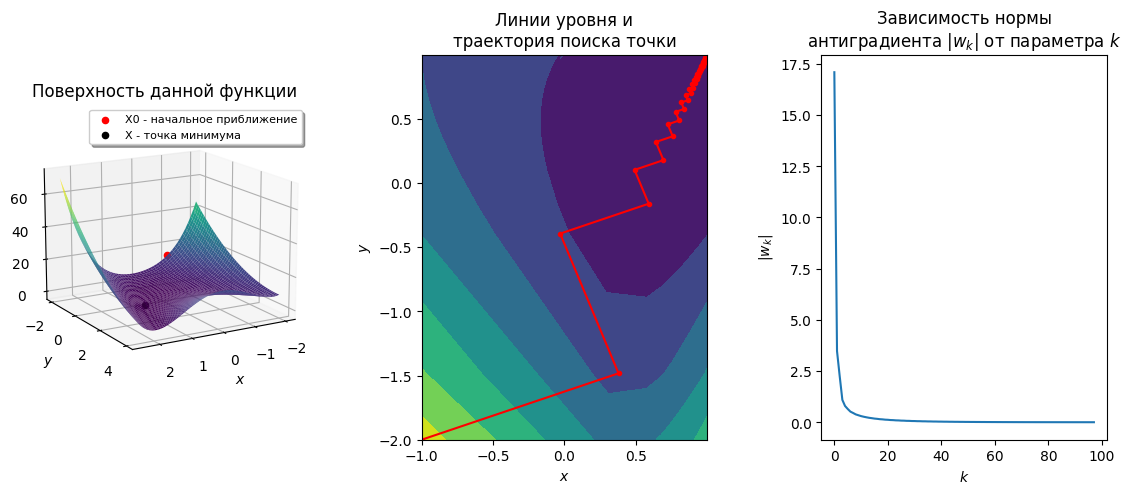

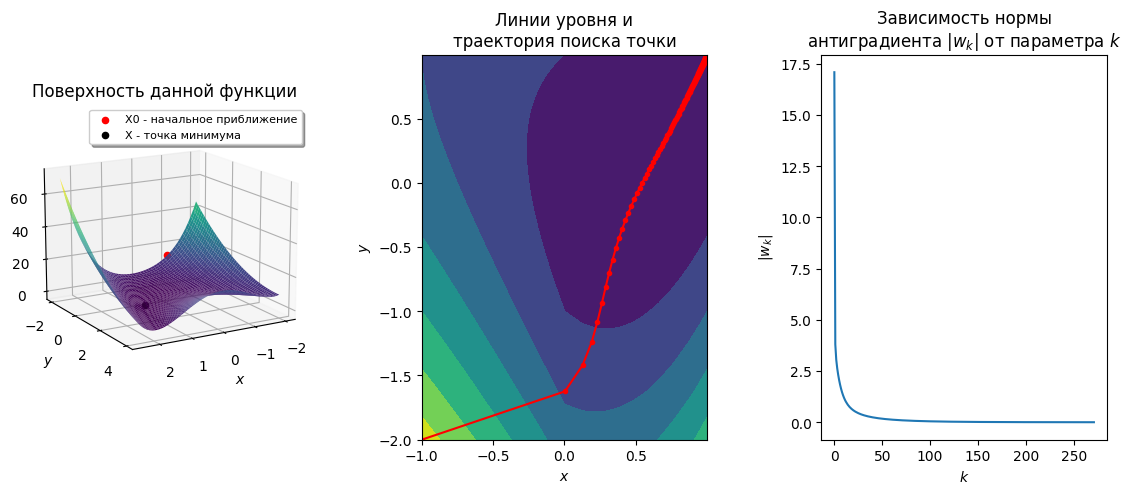

In [5]:
# Дано:
alpha = 1
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
X0 = np.array([-1, -2])
eps = 1e-3

# Параметры методов:
kappa0 = 1
nu = 0.95
omega = 0.5

# Вычисление градиента:
x_sym, y_sym = sympy.Symbol('x'), sympy.Symbol('y')
Grad_f = sympy.tensor.array.derive_by_array(f(x_sym, y_sym), (x_sym, y_sym))
Grad_f = sympy.lambdify((x_sym, y_sym), Grad_f, 'numpy')


def MethodGoldenRatio(f, b, a = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = f(Xk1), f(Xk2)
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
    return (Ak + Bk) / 2

def MethodsGradientDescent(flag):
    fun = lambda X: f(X[0], X[1])
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    X = X0
    kappa_k = kappa0
    NormW = []
    Xk = [[], []]
    while True:
        Xk[0].append(X[0])
        Xk[1].append(X[1])
        Wk = w(X)
        NormW.append(np.linalg.norm(Wk))
        if NormW[-1] <= eps:
            break
        fk = fun(X)
        if flag == 0:
            phi = lambda kappa: fun(X + kappa * Wk)
            kappa_k = MethodGoldenRatio(phi, 2.5)
            X = X + kappa_k * Wk
        elif flag == 1:
            Xcurr = X + kappa_k * Wk
            while fk - fun(Xcurr) <= omega * kappa_k * NormW[-1]**2:
                kappa_k *= nu
                Xcurr = X + kappa_k * Wk
            X = Xcurr
    return X, Xk, NormW

def DrawSurfContourAndWk(Xmin, Xk, NormW, flag):
    fig = plt.figure(figsize=(14, 5))
    axes1 = fig.add_subplot(1, 3, 1, projection='3d')
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.4)
    if flag == 0:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска')
    elif flag == 1:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска с дроблением шага')

    delta = max(abs(Xmin[0] - X0[0]), abs(Xmin[1] - X0[1]))
    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta/2, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, c='red', label='X0 - начальное приближение')
    axes1.scatter(Xmin[0], Xmin[1], f(Xmin[0], Xmin[1]), s=20, c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')

    X, Y = np.meshgrid(Xk[0], Xk[1])
    Z = f(X, Y)
    axes2.contourf(X, Y, Z)
    axes2.plot(Xk[0], Xk[1], marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Линии уровня и\nтраектория поиска точки')

    k = range(len(NormW))
    axes3.plot(k, NormW)
    axes3.set_xlabel('$k$')
    axes3.set_ylabel('$\|w_k\|$')
    axes3.set_title('Зависимость нормы\nантиградиента $\|w_k\|$ от параметра $k$')


print()
print('Методы градиентного спуска')
print('Дано:')
print('Целевая функция:        f(x, y) =', f(x_sym, y_sym))
print('Начальное приближение:  X0 =', X0)
print('Точность вычисления:    Eps =', eps)

for i in range(2):
    print()
    print('_' * 100)
    if i == 0:
        print(' ' * 30, ' Метод наискорейщего спуска ', ' ' * 30)
    elif i == 1:
        print(' ' * 20, ' Метод градиентного спуска с дроблением шага ', ' ' * 20)
    X, Xk, NormW = MethodsGradientDescent(i)
    print('Точка минимума функции:             Xmin =', X)
    print('Значение функции в точке минимума:  f(Xmin) =', f(X[0], X[1]))
    print('Количество итераций:                k =', len(NormW)-1)
    DrawSurfContourAndWk(X, Xk, NormW, i)
plt.show()

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import sympy as sp
import math as m
from mpl_toolkits import mplot3d


def f(x,y):
    return x**2 + 2*y*x + y**2

C:\Users\griho\AppData\Local\Temp\ipykernel_19596\557198268.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import sympy as sp
import math as m
from mpl_toolkits import mplot3d


# квадратичная функ первая, аналит решение, потому что выпуклая она. 

def f(x,y):
    return x**2 + 2*y*x + y**2


deltax = 0.000000001   

def fdx(x,y):
    return 

def fdy(x,y):
    return 2*y+2*x

# gradf =  np.array([g1,g2])

def g(x,y,alpha):
    G = f(  x - alpha * fdx(x,y) , y - alpha * fdy(x,y) )
    return G

eps = 1e-3
kappa0 = 1
nu = 0.95
omega = 0.5
    
def norm(x,y):
    return (m.sqrt(fdx(x,y)**2 +  fdy(x,y)**2))



    
def Dihotomia(a,b,eps,x,y):
    k =1
    lk,mk =0,0 #  Отклонения от середины отрезка влево, вправо
    delta = 0.5*eps
    x_ = 0 
    ak = a, bk = b
    while (bk - ak > eps):
        lk = (ak + bk - delta) / 2
        mk = (ak + bk + delta) / 2
        k +=1
        if (g(x1, x2, lk) <= g(x1, x2, mk)):
            bk = mk
        else:
                ak = lk               
    x_ = (ak + bk) / 2
    return x_  # х максимум
    
    
    
def GreatDescent(a,b,x,y,eps):
    n = 5
    k = 0
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    alpha = np.arange(100)
   
    for k in range(0, n + 1):
        alpha[k] = Dihotomia(a, b, eps, x[k], y[k])
        x[k+1] = x[k] - alpha[k] * fdx(x[k], y[k])
        y[k + 1] = y[k] - alpha[k] * fdy(x[k], y[k])
        k +=1
        if (norma(x[k + 1] - x[k], y[k + 1] - y[k])<epsilon):
            return F(x[k + 1], y[k + 1])
    return F(x[k + 1], y[k + 1]) 


    
    
    
    
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
F = f(x,y)
dy = fdx(x,y)


X = sp.Symbol('X')
Y = sp.Symbol('Y')
print('Целевая функция:        f(x, y) =', f(X,Y))



GG = GreatDescent(0,5,x,y,eps)
print (GG)



#fig, ax = 
fig = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, c ='black', lw = 1)

plt.plot(x,F, label = 'f(x)')
plt.plot(x,dy, label = 'df(x)')
plt.legend()

# def Rosenbrock(x,y):
#     return (1 + x)**2 + alph*(y - x**2)**2

Целевая функция:        f(x, y) = X**2 + 2*X*Y + Y**2


C:\Users\griho\AppData\Local\Temp\ipykernel_19596\2936431536.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


TypeError: cannot unpack non-iterable int object

C:\Users\griho\AppData\Local\Temp\ipykernel_14740\1426978866.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


[0.91654302 0.83970004]


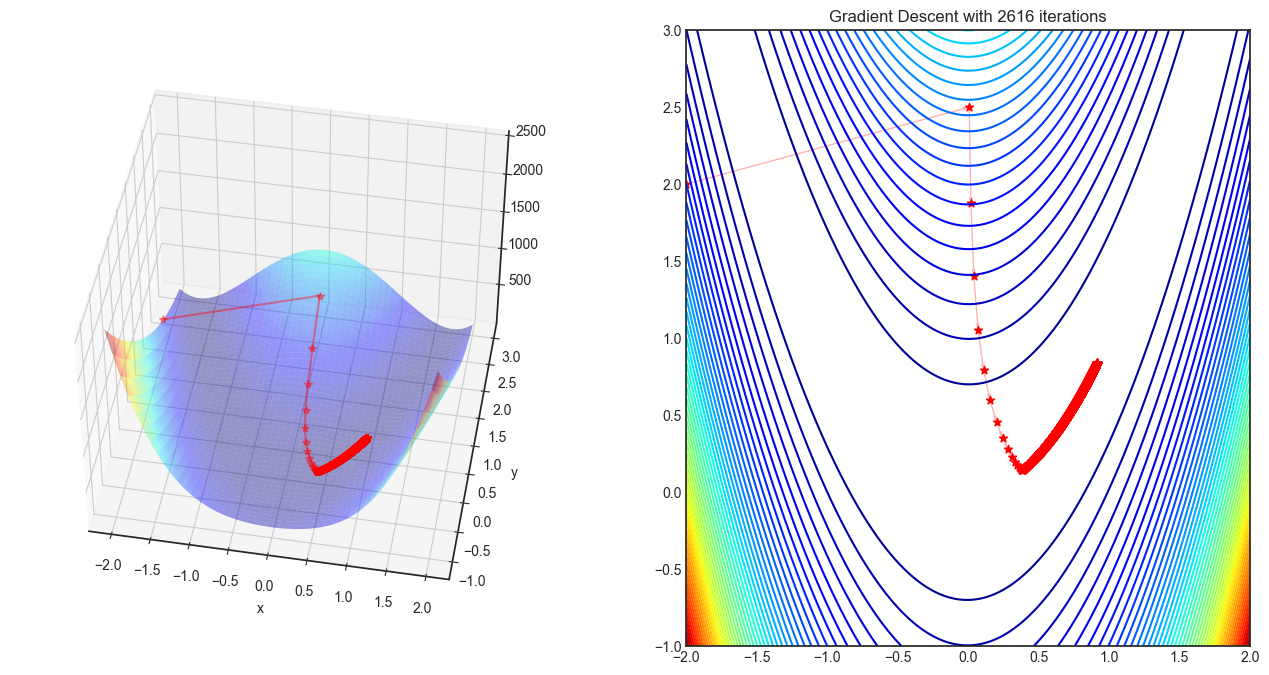

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d


def Rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])



def Gradient_Descent(Grad,x,y):
    gamma = 0.00125
    epsilon=0.01
    nMax = 10000 
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - gamma * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count


root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-2,2)


x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()


In [8]:
# библиотеки
import numpy as np # for math
import matplotlib.pyplot as plt # for graphics
#import SciPy as sp # 
from numpy import linalg as LA

# params
radius = 2 # working plane radius (ширина, высота графиков)      
#step = 1e-1  # step between two points


# исходная фукция
# differentiable_function
# Квадратичная
# The Rosenbrock function
# Розенброка (используемая для проверки эффективности алгоритмов оптимизации)
# Himmelblau's function
# Химмельблау (используемая для проверки эффективности алгоритмов оптимизации)
def func(x, y, func_number=''):
    if (func_number == 'quadratic'):
      return (x**2)/200+y**2+5

    elif (func_number == 'rosen'):
      return (1-x)**2+100*(y-x**2)**2

    elif (func_number == 'rosen2'):
      return (1-x)**2+2*(y-x**2)**2

    elif (func_number == 'himmel'):
      return (x**2+y-11)**2+(x+y**2-7)**2

    elif (func_number == 'myfunc'):
      return 2*x**2+y**2+2

    else:
      return x**2+y**2

def rosen(x):
    """The Rosenbrock function"""
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)


def antigrad_f(x, y, func_number=''):
    if (func_number == 'quadratic'):
      return np.array([-x/100 , -2*y])

    elif (func_number == 'rosen'):
      return np.array([-2*(-1 + x + 200 *x**3 - 200* x* y),-200*(-x**2 + y)])

    elif (func_number == 'rosen2'):
      return np.array([-2*(-1 + x + 4 *x**3 - 4* x* y),-4*(-x**2 + y)])

    elif (func_number == 'himmel'):
      return np.array([-2*(-7+x+y**2+2*x*(-11 + x**2 + y)),\
                       -2*(-11+x**2+y+2*y*(-7+x+y**2))])

    elif (func_number == 'myfunc'):
      return np.array([-4*x,-2*y])

    else:
      return np.array([-2*x,-2*y])

# метод наискорейшего спуска
# f - функция
# gradf - градиент
# x - начальная точка
def method_fastest_gradient_descend(x, eps, step, func_str):
    # f(x,y)=2*x**2+y**2;
    # antigrad_f(x,y) = [-4*x , -2*y]
    # x = [-3, -5];
    g = [0, 0] # x_best, y_best
    fi =(1+sqrt(5))/2 # метод золотого сечения
    k=1 #
    norm_g = 0
    while(True):
        b=[0, 1]
        g = double(gradf(x(k,1),x(k,2)), func_str)
        norm_g = LA.norm(g)
        if norm_g < eps:
            break
    
      g=g/norm_g
      x1= b(1,1) +(b(1,2)-b(1,1))/(fi+1)
      x2= b(1,2) -(b(1,2)-b(1,1))/(fi+1)
      f1 = double(func(x(k,1)+x1*g(1,1),x(k,2)+x1*g(1,2)), func_str)
      f2 = double(func(x(k,1)+x2*g(1,1),x(k,2)+x2*g(1,2)), func_str)
      while b(1,2)-b(1,1) > eps:
        if (f1<f2):
          b(1,2)=x2
          x2 =x1
          f2=f1
          x1 = b(1,1) +(b(1,2)-b(1,1))/(fi+1)
          f1=double(func(x(k,1)+x1*g(1,1),x(k,2)+x1*g(1,2)), func_str)
        else:
          b(1,1) = x1
          x1 = x2
          f1 = f2
          x2 = b(1,2) -(b(1,2)-b(1,1))/(fi+1)
          f2 = double(func(x(k,1)+x2*g(1,1),x(k,2)+x2*g(1,2)), func_str)

      bb=(b(1,1)+b(1,2))/2
      x(k+1,1)=x(k,1)+g(1,1)*bb
      x(k+1,2)=x(k,2)+g(1,2)*bb

      plot([x(k,1) x(k+1,1)],[x(k,2) x(k+1,2)])
      plot(x(k+1,1), x(k+1,2), '.', 'Color', 'r', 'MarkerSize',7)
      # plot([x(k+1,1) x(k+1,1)+(x(k,1)-x(k+1,1))/3],[x(k+1,2) x(k+1,2)],'r');
      # plot([x(k+1,1) x(k+1,1)],[x(k+1,2)+(x(k,2)-x(k+1,2))/3 x(k+1,2)],'r');
      # annotation('arrow',[0.7  0.9],  [0.9 1]);
      # arrow([x(k,1) x(k+1,1)],[x(k,2) x(k+1,2)]);
      if abs(func(x(k+1,1),x(k+1,2), func_str)-func(x(k,1),x(k,2), func_str))<eps:
        break

      k+=1

    return g[0], g[1]

# рисуем график
def draw_chart(point, grid, func_str):
    #1
    point_x, point_y, point_z = point
    grid_x, grid_y, grid_z = grid
    plot.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4
    })
    ax = plot.figure().add_subplot(111, projection='3d')
    ax.scatter(point_x, point_y, point_z, color='red')
    ax.plot_surface(grid_x, grid_y, grid_z, rstride=5, cstride=5, alpha=0.7)
    plot.show()

    #2
    h = plt.contourf(grid_x, grid_y, grid_z)
    plt.axis('scaled')
    plt.show()

# получаем область отрисовки
def get_grid(grid_step, func_str):
    samples = np.arange(-radius, radius, grid_step)
    xx, yy = np.meshgrid(samples, samples)
    return xx, yy, func(xx, yy, func_str)

# main
if __name__ == '__main__':
    # 'quadratic' 'rosen' 'rosen2' 'himmel' 'myfunc'

    #1
    x = np.array([-3, -5])
    func_str = 'myfunc'
    eps = 1e-9          
    step = 1e-1

    min_x, min_y = method_fastest_gradient_descend(x, eps, step, func_str)
    minimum = (min_x, min_y, func(min_x, min_y, func_str))
    draw_chart(minimum, get_grid(0.05, func_str), func_str)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 82)